In [48]:
import cvxpy as cp
import numpy as np
import pandas as pd

df = pd.read_csv("Predicted_Resource_utilization.csv")

resources = ["small", "medium", "large"]
R = len(resources)

y_pred = df["workload"].values[:50]
cpu = df["cpu_utilization"].values[:50]
memory = df["memory_usage"].values[:50]
storage = df["storage_usage"].values[:50]
T = len(y_pred)

x = cp.Variable((T, R), integer=True)

alloc = cp.sum(x, axis=1)

capacity_limit = (
      0.2 * cpu + 0.46 * memory + 0.3 * storage
)


objective = cp.Maximize(cp.sum(alloc))

constraints = [
    alloc <= y_pred,         
    alloc <= capacity_limit,  
    x >= 0                    
]

# Solve
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCIP, verbose=True)

# Results
if x.value is not None:
    x_opt = np.rint(x.value).astype(int)
    alloc_df = pd.DataFrame(x_opt, columns=resources)
    alloc_df["total_allocation"] = alloc_df[resources].sum(axis=1)
    alloc_df["predicted_demand"] = y_pred
    alloc_df["served_demand"] = np.minimum(alloc_df["total_allocation"], y_pred)
    print(alloc_df.head())
    print("Total Served Demand:", alloc_df["served_demand"].sum())
else:
    print("Solver failed:", prob.status)


(CVXPY) Sep 06 02:59:30 PM: Your problem has 150 variables, 250 constraints, and 0 parameters.
(CVXPY) Sep 06 02:59:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 06 02:59:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 06 02:59:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 06 02:59:30 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Sep 06 02:59:30 PM: Compiling problem (target solver=SCIP).
(CVXPY) Sep 06 02:59:30 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCIP
(CVXPY) Sep 06 02:59:30 PM: Applying reduction FlipObjective
(CVXPY) Sep 06 02:59:30 PM: Applying reduction Dcp2Cone
(CVXPY) Sep 06 02:59:30 PM: Applying reduction CvxAttr2Constr
(CVXPY) Sep 06 02:59:30 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Sep 06 02:59:30 PM: Applying 

                                     CVXPY                                     
                                     v1.7.2                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
feasible solution found by trivial heuristic after 0.0 seconds, objective value 0.000000e+00
presolving:
(round 1, fast)       0 del vars, 150 del conss, 0 add conss, 150 chg bounds, 83 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       0 del vars, 150 del conss, 0 add conss, 420 chg bounds, 103 chg sides, 0 chg coeffs, 0 upgd conss

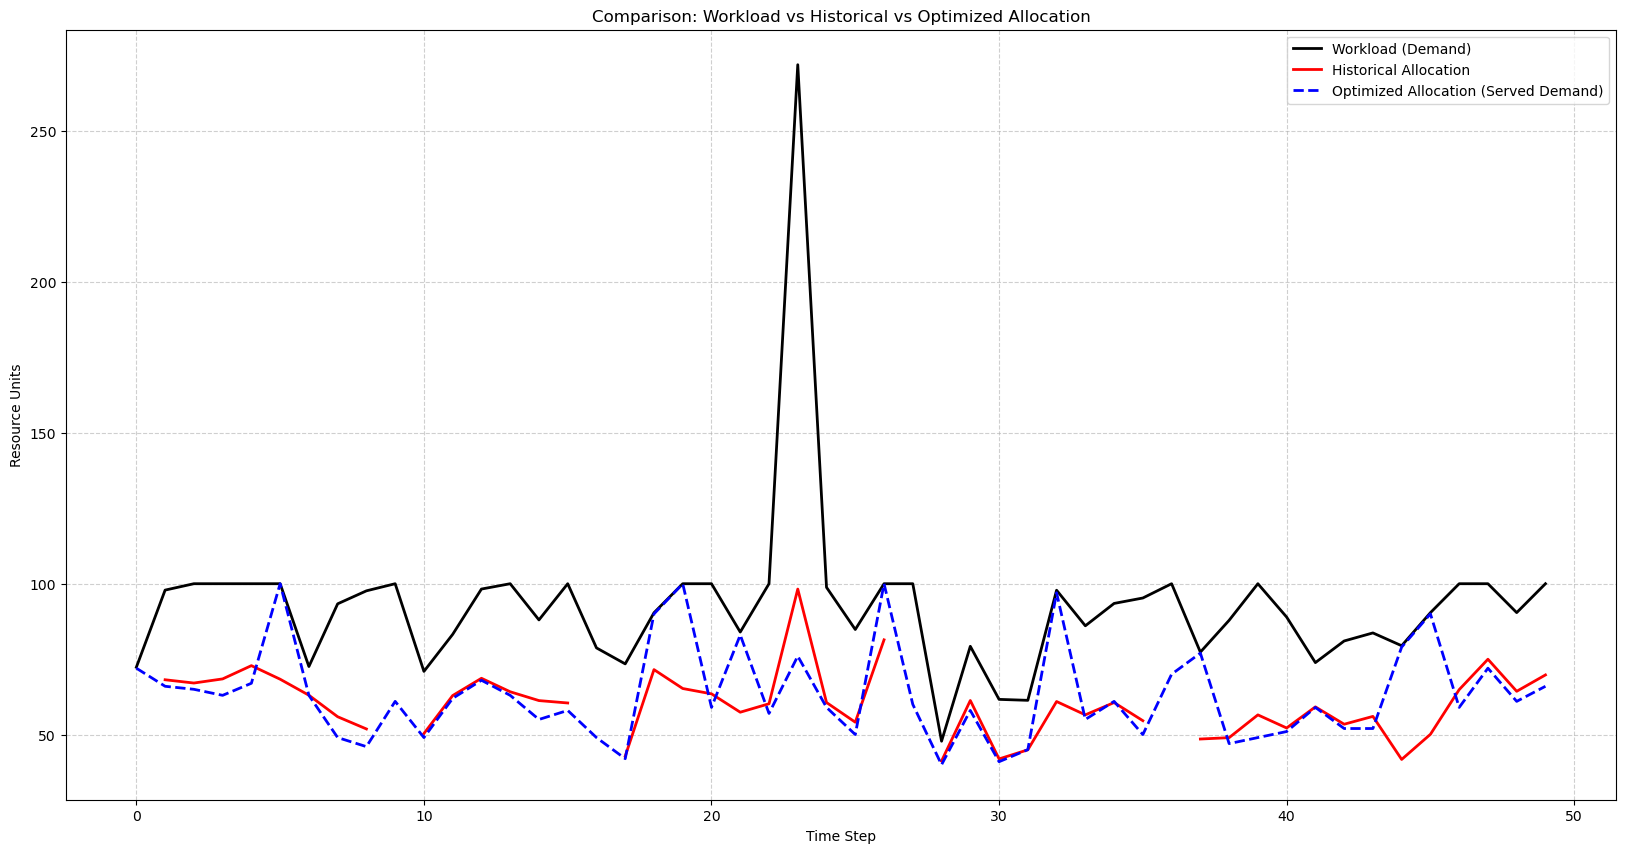

In [49]:
import matplotlib.pyplot as plt

alloc_df["historical_allocation"] = df["Resource Allocation"].values[:T]

# Plot comparison
plt.figure(figsize=(20,10))
plt.plot(alloc_df.index, alloc_df["predicted_demand"], label="Workload (Demand)", lw=2, color="black")
plt.plot(alloc_df.index, alloc_df["historical_allocation"], label="Historical Allocation", lw=2, color="red")
plt.plot(alloc_df.index, alloc_df["served_demand"], label="Optimized Allocation (Served Demand)", lw=2, linestyle="--", color="blue")

plt.xlabel("Time Step")
plt.ylabel("Resource Units")
plt.title("Comparison: Workload vs Historical vs Optimized Allocation")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [50]:
import cvxpy as cp
import numpy as np
import pandas as pd

df = pd.read_csv("Predicted_Resource_utilization.csv")

resources = ["small", "medium", "large"]
R = len(resources)

y_pred = df["predicted_workload"].values[:50]
cpu = df["cpu_utilization"].values[:50]
memory = df["memory_usage"].values[:50]
storage = df["storage_usage"].values[:50]
T = len(y_pred)

x = cp.Variable((T, R), integer=True)

alloc = cp.sum(x, axis=1)

capacity_limit = (
      0.7 * cpu + 0.5 * memory + 0.3 * storage
)


objective = cp.Maximize(cp.sum(alloc))

constraints = [
    alloc <= y_pred,         
    alloc <= capacity_limit,  
    x >= 0                    
]

# Solve
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCIP, verbose=True)

# Results
if x.value is not None:
    x_opt = np.rint(x.value).astype(int)
    alloc_df = pd.DataFrame(x_opt, columns=resources)
    alloc_df["total_allocation"] = alloc_df[resources].sum(axis=1)
    alloc_df["predicted_demand"] = y_pred
    alloc_df["served_demand"] = np.minimum(alloc_df["total_allocation"], y_pred)
    print(alloc_df.head())
    print("Total Served Demand:", alloc_df["served_demand"].sum())
else:
    print("Solver failed:", prob.status)


(CVXPY) Sep 06 02:59:30 PM: Your problem has 150 variables, 250 constraints, and 0 parameters.
(CVXPY) Sep 06 02:59:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 06 02:59:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 06 02:59:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 06 02:59:30 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Sep 06 02:59:30 PM: Compiling problem (target solver=SCIP).
(CVXPY) Sep 06 02:59:30 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCIP
(CVXPY) Sep 06 02:59:30 PM: Applying reduction FlipObjective
(CVXPY) Sep 06 02:59:30 PM: Applying reduction Dcp2Cone
(CVXPY) Sep 06 02:59:30 PM: Applying reduction CvxAttr2Constr
(CVXPY) Sep 06 02:59:30 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Sep 06 02:59:30 PM: Applying 

                                     CVXPY                                     
                                     v1.7.2                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
feasible solution found by trivial heuristic after 0.0 seconds, objective value 0.000000e+00
presolving:
(round 1, fast)       0 del vars, 150 del conss, 0 add conss, 150 chg bounds, 100 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       0 del vars, 150 del conss, 0 add conss, 366 chg bounds, 120 chg sides, 0 chg coeffs, 0 upgd cons

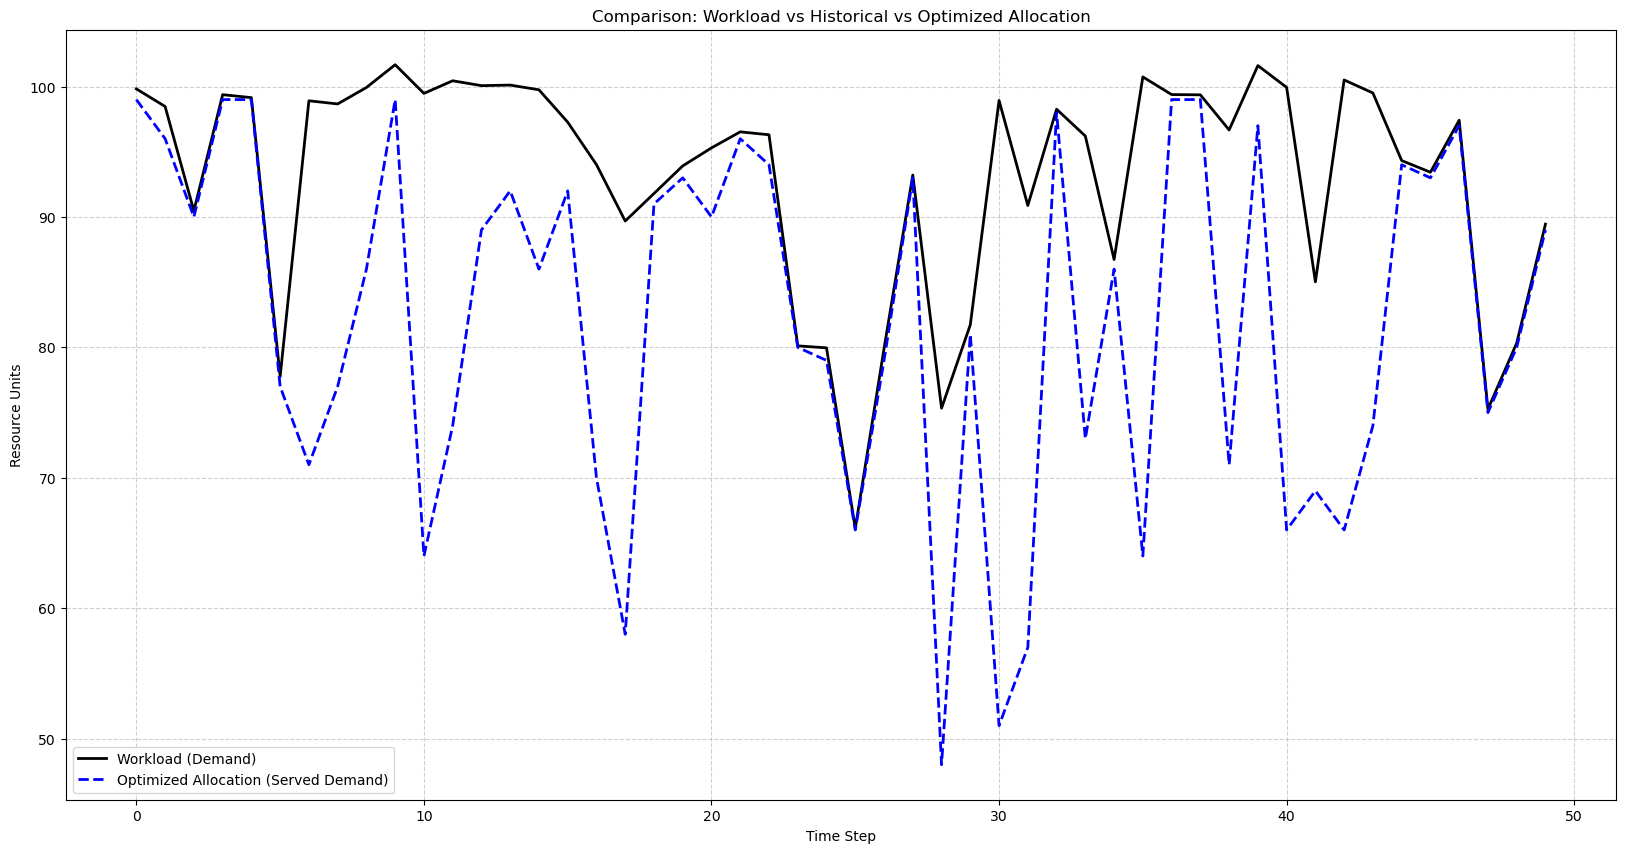

In [51]:
import matplotlib.pyplot as plt

alloc_df["historical_allocation"] = df["Resource Allocation"].values[:T]

# Plot comparison
plt.figure(figsize=(20,10))
plt.plot(alloc_df.index, alloc_df["predicted_demand"], label="Workload (Demand)", lw=2, color="black")
plt.plot(alloc_df.index, alloc_df["served_demand"], label="Optimized Allocation (Served Demand)", lw=2, linestyle="--", color="blue")

plt.xlabel("Time Step")
plt.ylabel("Resource Units")
plt.title("Comparison: Workload vs Historical vs Optimized Allocation")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
